In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweet_df = pd.read_csv('final_data.csv')
tweet_df.head()

,date,username,Lemma,Subjectivity,Polarity,Analysis
0,10/12/2022 0:00,rajaindotama,rekaman cctv rizki billar melempar bola bill...,0.0,0.0,Netral
1,10/12/2022 0:00,fajaronline,bukan sekali saja ini video bukti kdrizky bi...,0.0,0.0,Netral
2,10/12/2022 0:00,holopiscom,kasus prank kdyang dilakukan baim wong dan p...,0.0,0.0,Netral
3,10/11/2022 0:00,newsmerahputih,menurut kasandra putranto psikolog dari ui m...,0.0,0.0,Netral
4,10/11/2022 0:00,wahananewsdotco,soal prank kdrt kameramen baim wong dicecar ...,0.0,0.0,Netral


In [3]:
tweet_df = pd.DataFrame(tweet_df[['Analysis','Lemma']])
tweet_df

,Analysis,Lemma
0,Netral,rekaman cctv rizki billar melempar bola bill...
1,Netral,bukan sekali saja ini video bukti kdrizky bi...
2,Netral,kasus prank kdyang dilakukan baim wong dan p...
3,Netral,menurut kasandra putranto psikolog dari ui m...
4,Netral,soal prank kdrt kameramen baim wong dicecar ...
...,...,...
557,Netral,angka pasaran taiwan hari ini adalah result ...
558,Netral,ramainya pemberitaan mengenai konten prank k...
559,Netral,bikin konten prank laporan kdrt ahli pidana ...
560,Netral,baim wong dan paula verhoeven minta maaf pol...


In [4]:
new_names = {'Analysis' : 'Label',
            'Lemma' : 'Tweet'}

In [5]:
tweet_df.rename(columns=new_names, inplace=True)

In [6]:
# contoh tweet Netral
tweet_df[tweet_df['Label']=='Netral'].head()

,Label,Tweet
0,Netral,rekaman cctv rizki billar melempar bola bill...
1,Netral,bukan sekali saja ini video bukti kdrizky bi...
2,Netral,kasus prank kdyang dilakukan baim wong dan p...
3,Netral,menurut kasandra putranto psikolog dari ui m...
4,Netral,soal prank kdrt kameramen baim wong dicecar ...


In [7]:
tweet_df['Tweet'][0]


'  rekaman cctv rizki billar melempar bola billiard ke lesti kejora namun aksi nya gagal karena rizky terpeleset kdrizkybillar banjir txtinjakarta'

In [8]:
# contoh tweet Negative
tweet_df[tweet_df['Label']=='Negative'].head()

,Label,Tweet
15,Negative,billar disebut kena mental pasca dilaporkan ...
88,Negative,kekerasan dalam rumah tangga kdrt berkontrib...
187,Negative,pamungkas ma pam berkat dibully netizen ment...
288,Negative,berita terkini rizkybillar disebut kena ment...
337,Negative,mengaku kena mental rizky billar mangkir dar...


In [9]:
tweet_df['Tweet'][337]

'  mengaku kena mental rizky billar mangkir dari pemeriksaan soal kd rizkybilar kd'

In [10]:
# check missing values
tweet_df.isnull().sum().sort_values(ascending=False)

Label    0
Tweet    0
dtype: int64

# Class Distribution

Netral      520
Positive     33
Negative      9
Name: Label, dtype: int64


AxesSubplot(0.125,0.11;0.775x0.77)


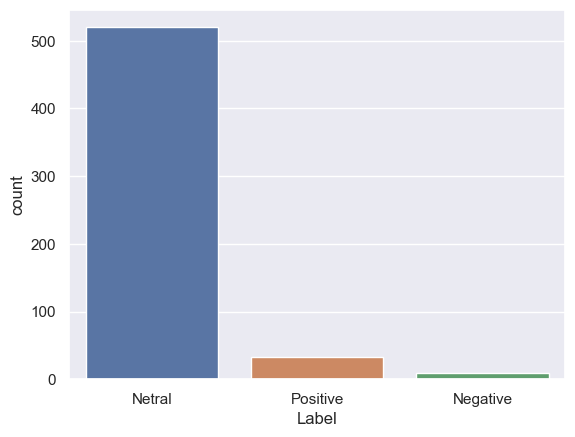

In [11]:
print(tweet_df['Label'].value_counts())
print('\n')
print(sns.countplot(tweet_df['Label']))

In [12]:
jum_Negative = tweet_df[tweet_df['Label']=='Negatuve']['Label'].count()
jum_Netral = tweet_df[tweet_df['Label']=='Netral']['Label'].count()
jum_Positive = tweet_df[tweet_df['Label']=='Positive']['Label'].count()


percent_Negative = (jum_Negative/(jum_Netral+jum_Negative+jum_Positive)*100)
percent_Netral = (jum_Netral/(jum_Netral+jum_Negative+jum_Positive)*100)
percent_Positive = (jum_Positive/(jum_Netral+jum_Negative+jum_Positive))*100
print(percent_Negative)
print(percent_Netral)
print(percent_Positive)

0.0
94.03254972875226
5.967450271247739


In [13]:
# info dataset
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   562 non-null    object
 1   Tweet   562 non-null    object
dtypes: object(2)
memory usage: 8.9+ KB


In [14]:
# describe dataset
tweet_df.describe()

,Label,Tweet
count,562,562
unique,3,542
top,Netral,rizky billar mengaku terganggu psikologisnya...
freq,520,4


array([[<AxesSubplot:title={'center':'Negative'}>,
        <AxesSubplot:title={'center':'Netral'}>],
       [<AxesSubplot:title={'center':'Positive'}>, <AxesSubplot:>]],
      dtype=object)

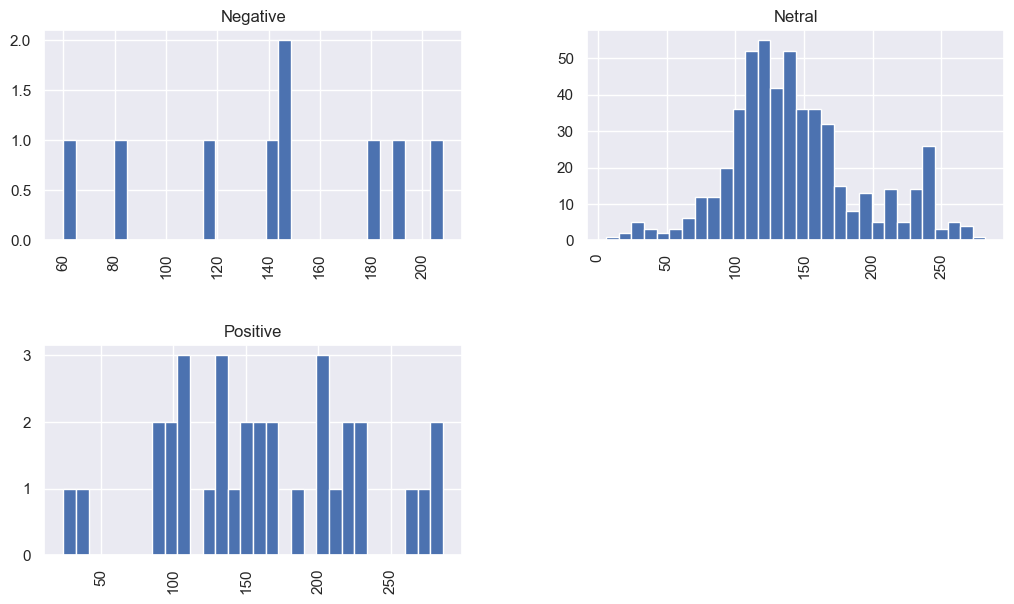

In [15]:
tweet_df['length'] = tweet_df['Tweet'].apply(len)
tweet_df.hist(column='length', by='Label', bins=30, figsize=(12,7))
     

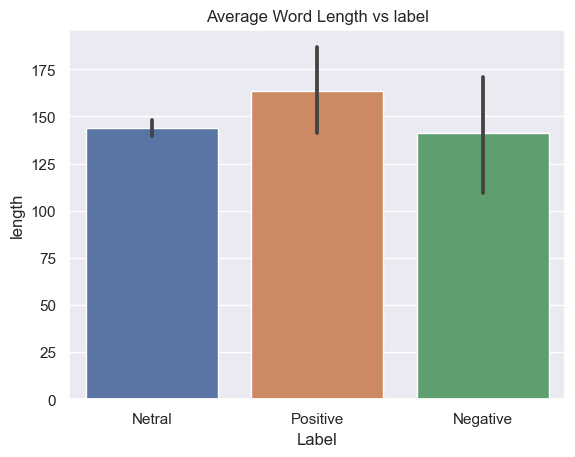

In [16]:
fig1 = sns.barplot(x='Label',y='length',data = tweet_df)
plt.title('Average Word Length vs label')
plot = fig1.get_figure()

## Prepocessing 

In [17]:
df =tweet_df.copy()


### Case Folding

In [18]:
import re

In [19]:
def case_folding(data):
  temp_tweet = []

  for tw in data:
    # removal of @name[mention]
    tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

    # removal of links[https://blabala.com]
    # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    tw = re.sub(r"http\S+", "", tw)

    # removal of new line
    tw = re.sub('\n', '', tw)

    # removal of RT
    tw = re.sub('RT', '', tw)

    # removal of punctuations and numbers
    tw = re.sub("[^a-zA-Z^']", " ", tw)
    tw = re.sub(" {2,}", " ", tw)

    # remove leading and trailing whitespace
    tw = tw.strip()

    # remove whitespace with a single space
    tw = re.sub(r'\s+', ' ', tw)

    # convert text to Lowercase
    tw = tw.lower();
    temp_tweet.append(tw)
  return temp_tweet

In [20]:
df['Case_folded']=case_folding(df['Tweet'])
df.head()

,Label,Tweet,length,Case_folded
0,Netral,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...
1,Netral,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...
2,Netral,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...
3,Netral,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...
4,Netral,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...


### Tokenize

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
def tokenized(data):
    return data.apply(nltk.word_tokenize)

In [23]:
df['Tokenized']=tokenized(df['Case_folded'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized
0,Netral,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...,"[rekaman, cctv, rizki, billar, melempar, bola,..."
1,Netral,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...,"[bukan, sekali, saja, ini, video, bukti, kdriz..."
2,Netral,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...,"[kasus, prank, kdyang, dilakukan, baim, wong, ..."
3,Netral,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...,"[menurut, kasandra, putranto, psikolog, dari, ..."
4,Netral,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...,"[soal, prank, kdrt, kameramen, baim, wong, dic..."


### Stemming 

In [24]:
!pip install Sastrawi

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(data):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(tweet) for tweet in data]

In [26]:
df['Stemmed'] = df['Tokenized'].apply(stemming)

In [27]:
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed
0,Netral,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...,"[rekaman, cctv, rizki, billar, melempar, bola,...","[rekam, cctv, rizki, billar, lempar, bola, bil..."
1,Netral,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...,"[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz..."
2,Netral,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...,"[kasus, prank, kdyang, dilakukan, baim, wong, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ..."
3,Netral,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...,"[menurut, kasandra, putranto, psikolog, dari, ...","[turut, kasandra, putranto, psikolog, dari, ui..."
4,Netral,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...,"[soal, prank, kdrt, kameramen, baim, wong, dic...","[soal, prank, kdrt, kameramen, baim, wong, cec..."


### Slang Words Removal 

In [28]:
import requests

In [29]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [30]:
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [31]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [32]:
# remove trailing white space
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [33]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
    slang_dict.update({row['Old']: row['New']})

In [34]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
        data[i] = slang_dict[word]
        # if data is not slang then pass
    except KeyError:
        pass
    return data

In [35]:
df['No_Slang'] = df['Stemmed'].apply(removeSlang)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang
0,Netral,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...,"[rekaman, cctv, rizki, billar, melempar, bola,...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil..."
1,Netral,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...,"[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz..."
2,Netral,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...,"[kasus, prank, kdyang, dilakukan, baim, wong, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ..."
3,Netral,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...,"[menurut, kasandra, putranto, psikolog, dari, ...","[turut, kasandra, putranto, psikolog, dari, ui...","[turut, kasandra, putranto, psikolog, dari, ui..."
4,Netral,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...,"[soal, prank, kdrt, kameramen, baim, wong, dic...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[soal, prank, kdrt, kameramen, baim, wong, cec..."


### Stop Words Removal 

In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def removeStopWords(data):
    stop_words = set(stopwords.words('indonesian'))
    return data.apply(lambda x: [item for item in x if item not in stop_words])

In [38]:
df['No_Stop']=removeStopWords(df['No_Slang'])
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,Netral,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...,"[rekaman, cctv, rizki, billar, melempar, bola,...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil..."
1,Netral,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...,"[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[video, bukti, kdrizky, billar, lesti, kejora,..."
2,Netral,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...,"[kasus, prank, kdyang, dilakukan, baim, wong, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[prank, kdyang, laku, baim, paula, verhoeven, ..."
3,Netral,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...,"[menurut, kasandra, putranto, psikolog, dari, ...","[turut, kasandra, putranto, psikolog, dari, ui...","[turut, kasandra, putranto, psikolog, dari, ui...","[kasandra, putranto, psikolog, ui, kdpada, aki..."
4,Netral,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...,"[soal, prank, kdrt, kameramen, baim, wong, dic...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[prank, kdrt, kameramen, baim, cecar, baimwong..."


In [39]:
##Encoding Target

In [40]:
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'Negative' else 0)
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,0,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...,"[rekaman, cctv, rizki, billar, melempar, bola,...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil..."
1,0,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...,"[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[video, bukti, kdrizky, billar, lesti, kejora,..."
2,0,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...,"[kasus, prank, kdyang, dilakukan, baim, wong, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[prank, kdyang, laku, baim, paula, verhoeven, ..."
3,0,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...,"[menurut, kasandra, putranto, psikolog, dari, ...","[turut, kasandra, putranto, psikolog, dari, ui...","[turut, kasandra, putranto, psikolog, dari, ui...","[kasandra, putranto, psikolog, ui, kdpada, aki..."
4,0,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...,"[soal, prank, kdrt, kameramen, baim, wong, dic...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[prank, kdrt, kameramen, baim, cecar, baimwong..."


In [41]:
# combine cleaned text after removing stop words into one string
df['Ready'] = df['No_Stop'].apply(lambda x: ' '.join(x))
df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,0,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...,"[rekaman, cctv, rizki, billar, melempar, bola,...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil...",rekam cctv rizki billar lempar bola billiard l...
1,0,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...,"[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[video, bukti, kdrizky, billar, lesti, kejora,...",video bukti kdrizky billar lesti kejora hamil ...
2,0,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...,"[kasus, prank, kdyang, dilakukan, baim, wong, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[prank, kdyang, laku, baim, paula, verhoeven, ...",prank kdyang laku baim paula verhoeven buntut ...
3,0,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...,"[menurut, kasandra, putranto, psikolog, dari, ...","[turut, kasandra, putranto, psikolog, dari, ui...","[turut, kasandra, putranto, psikolog, dari, ui...","[kasandra, putranto, psikolog, ui, kdpada, aki...",kasandra putranto psikolog ui kdpada akibat sa...
4,0,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...,"[soal, prank, kdrt, kameramen, baim, wong, dic...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[prank, kdrt, kameramen, baim, cecar, baimwong...",prank kdrt kameramen baim cecar baimwong paula...


In [42]:
df.to_csv('FinalLast.csv', index=False)

### Combine Cleaned Tweet and Label

In [43]:
data1 = df[['Ready']]
data2 = df[['Label']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,Label
0,rekam cctv rizki billar lempar bola billiard l...,0
1,video bukti kdrizky billar lesti kejora hamil ...,0
2,prank kdyang laku baim paula verhoeven buntut ...,0
3,kasandra putranto psikolog ui kdpada akibat sa...,0
4,prank kdrt kameramen baim cecar baimwong paula...,0


### Text Vectorization (TF-IDF) 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = dataset['Ready']
label = dataset['Label']
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(562, 1907)

### Dealing With Imbalance Class 

In [45]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(tfidf_vector, label)
print(tfidf_vector.shape)
print(label.shape)

(1106, 1907)
(1106,)


### Split Data (Training and Testing Data) 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(884, 1907)
(222, 1907)
(884,)
(222,)


### Most Common Words VS Importants Words 

In [47]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])                    
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

#Print
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 patah        0.0
love         0.0
gbv          0.0
ridhoda      0.0
neng         0.0
kdrossa      0.0
gendong      0.0
kdartists    0.0
tdk          0.0
geulis       0.0
dtype: float64


Most important words:
 kdkd                  1.000000
suluhjateng           0.925197
tragedikanjuruhan     0.869140
kdpoldametrojaya      0.865101
lestikdrizkybillar    0.814231
selingkuh             0.812882
upside                0.796656
selesai               0.748420
islam                 0.725909
temperamen            0.724777
dtype: float64


### WordCloud 

In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Hate Speech Wordcloud 

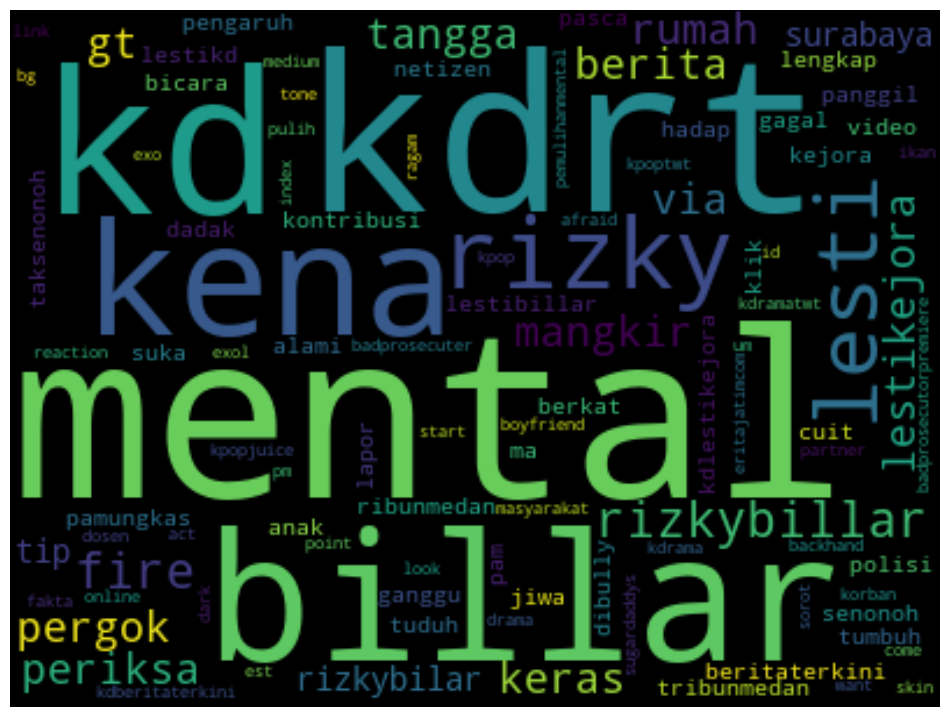

In [50]:
hs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Non Hate Speech Wordcloud 

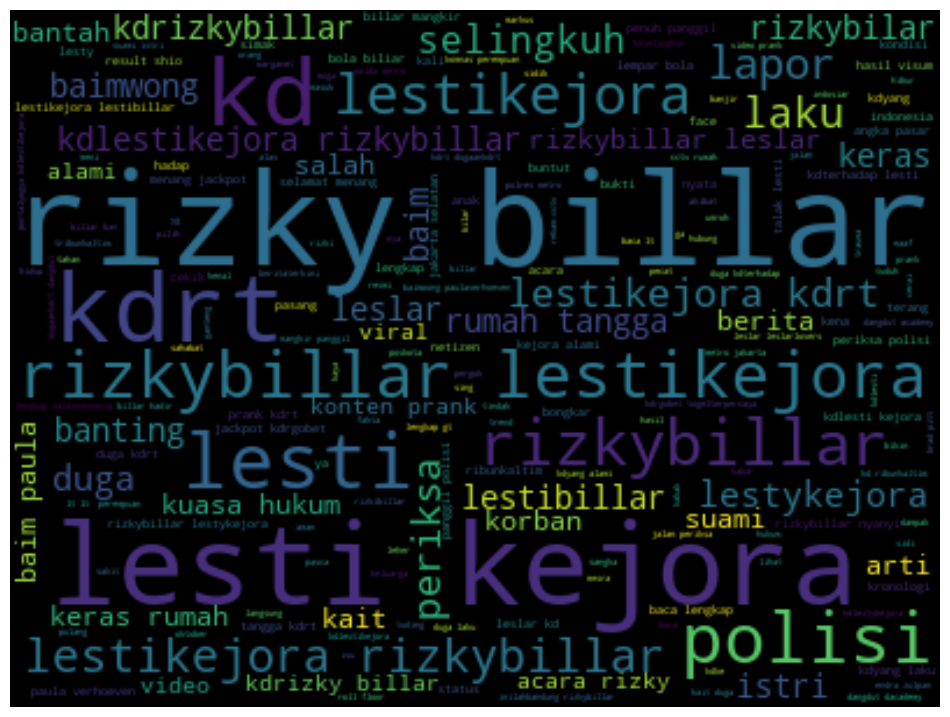

In [51]:
nonhs_words = ' '.join([word for word in dataset['Ready'][dataset['Label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Modeling 

In [52]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [53]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### SVM 

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

1.0
1.0


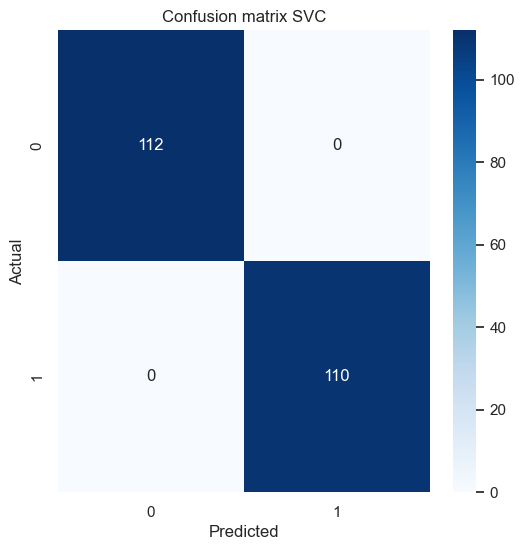

In [55]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

In [56]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       110

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



### KNN

In [57]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.751131221719457
0.7027027027027027


In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### XGBOOST

In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #training svc model
y_pred_xgb = xgb.predict(X_test) # predicting test data
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

1.0
1.0


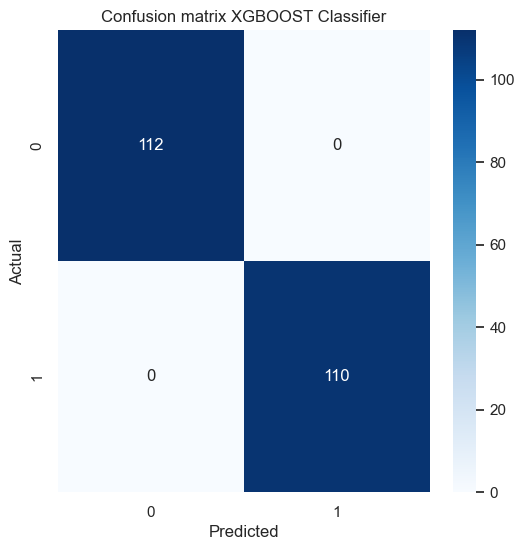

In [60]:
print_conf(y_test, y_pred_xgb, [0, 1], title="Confusion matrix XGBOOST Classifier")

In [61]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       110

    accuracy                           1.00       222
   macro avg       1.00      1.00      1.00       222
weighted avg       1.00      1.00      1.00       222



In [62]:
#Model Comparison
# Accuracy Comparison
models = ['SVM', 'XGBOOST','KNN']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accKNN = metrics.accuracy_score(y_test, y_pred_knn)
accuracies = [accSVMC, accXGB, accKNN]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,1.000000
1,XGBOOST,1.000000
2,KNN,0.702703


In [63]:
import joblib

# Saving model
joblib.dump(svc, 'Hate Speech Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Hate Speech TF-IDF Vectorizer.joblib')

['Hate Speech TF-IDF Vectorizer.joblib']

In [64]:
df['prediction'] = svc.predict(tfidf_vectorizer.transform(df['Tweet']))
df['prediction'] = df['prediction'].apply(lambda x: 'HS' if x==1 else 'Non_HS')

# Save new dataframe into csv file
df.to_csv('Hate Speech Classification.csv', index=False)

df.head()

,Label,Tweet,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready,prediction
0,0,rekaman cctv rizki billar melempar bola bill...,145,rekaman cctv rizki billar melempar bola billia...,"[rekaman, cctv, rizki, billar, melempar, bola,...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil...","[rekam, cctv, rizki, billar, lempar, bola, bil...",rekam cctv rizki billar lempar bola billiard l...,Non_HS
1,0,bukan sekali saja ini video bukti kdrizky bi...,107,bukan sekali saja ini video bukti kdrizky bill...,"[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[bukan, sekali, saja, ini, video, bukti, kdriz...","[video, bukti, kdrizky, billar, lesti, kejora,...",video bukti kdrizky billar lesti kejora hamil ...,Non_HS
2,0,kasus prank kdyang dilakukan baim wong dan p...,204,kasus prank kdyang dilakukan baim wong dan pau...,"[kasus, prank, kdyang, dilakukan, baim, wong, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[kasus, prank, kdyang, laku, baim, wong, dan, ...","[prank, kdyang, laku, baim, paula, verhoeven, ...",prank kdyang laku baim paula verhoeven buntut ...,Non_HS
3,0,menurut kasandra putranto psikolog dari ui m...,237,menurut kasandra putranto psikolog dari ui men...,"[menurut, kasandra, putranto, psikolog, dari, ...","[turut, kasandra, putranto, psikolog, dari, ui...","[turut, kasandra, putranto, psikolog, dari, ui...","[kasandra, putranto, psikolog, ui, kdpada, aki...",kasandra putranto psikolog ui kdpada akibat sa...,Non_HS
4,0,soal prank kdrt kameramen baim wong dicecar ...,105,soal prank kdrt kameramen baim wong dicecar pe...,"[soal, prank, kdrt, kameramen, baim, wong, dic...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[soal, prank, kdrt, kameramen, baim, wong, cec...","[prank, kdrt, kameramen, baim, cecar, baimwong...",prank kdrt kameramen baim cecar baimwong paula...,Non_HS


In [65]:
data = input('Masukkan text tweet = ')
input_tweet = [data]

def preProcessText(tweer):
    new_tweets = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)data = input('Masukkan text tweet = ')
input_tweet = [data]

def preProcessText(tweer):
    new_tweets = []
    for tw in texts:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_tweets.append(tw)

    return new_tweets

def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib') 
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
            print('Input text:\n', 
                input_tweet[i], 
                '\nPrediction: \nHate Speech!\n')
        else:
            print('Input text:\n', 
                input_tweet[i], 
                "\nPrediction: \nNot a Hate Speech.\n")
            
predictNewData(input_tweet)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_tweets.append(tw)

    return new_tweets

def predictNewData(tweets):
    saved_model = joblib.load('Hate Speech Classifier.joblib') 
    saved_tfidf = joblib.load('Hate Speech TF-IDF Vectorizer.joblib')

    vectorized_tweets = saved_tfidf.transform(tweets)
    input_prediction = saved_model.predict(vectorized_tweets)

    for i in range(len(input_tweet)):
        if input_prediction[i]==1:
            print('Input text:\n', 
                input_tweet[i], 
                '\nPrediction: \nHate Speech!\n')
        else:
            print('Input text:\n', 
                input_tweet[i], 
                "\nPrediction: \nNot a Hate Speech.\n")
            
predictNewData(input_tweet)

Masukkan text tweet = billar
Input text:
 billar 
Prediction: 
Not a Hate Speech.

